In [1]:
# Logistic Regression을 구현해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [4]:
# Raw Data Loading
df = pd.read_csv('admission.csv')
# display(df)  # 400 rows × 4 columns

# 결측치 부터 알아보아요!
# df.info()
# df.isnull().sum()
# 결측치는 존재하지 않네요!

# 이상치도 알아보아야 해요!
# 이상치를 눈으로 확인하려면 boxplot을 그려보면 되요!
# fig = plt.figure()
# fig_gre = fig.add_subplot(1,3,1)
# fig_gpa = fig.add_subplot(1,3,2)
# fig_rank = fig.add_subplot(1,3,3)

# fig_gre.boxplot(df['gre'])
# fig_gpa.boxplot(df['gpa'])
# fig_rank.boxplot(df['rank'])

# plt.tight_layout()
# plt.show()

# 수치상 이상치로 표현이 되지만
# 실제 데이터예요!(이상치가 아니예요!)
# 하지만 우리학습을 위해 이상치로 판별된 데이터를 삭제하고 진행

zscore_threshold = 2.0  # zscore 임계값 -2이하, 2이상이면 이상치

for col in df.columns:
    outlier = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[np.isin(df[col], outlier, invert=True)]

print(df.shape)  # (382, 4)  18개의 데이터가 이상치로 제거!

# 정규화를 진행해야 해요!
x_data = df.drop('admit', axis=1, inplace=False).values
t_data = df['admit'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

(382, 4)


In [5]:
# Model을 구현해 보아요!
# sklearn부터 구현해 보아요!

sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data,
                  t_data.ravel())

# predict
predict_value = np.array([[600, 3.8, 1]])
result_proba = sklearn_model.predict_proba(predict_value)
print(result_proba)  # [[0.43740782 0.56259218]]


[[0.43740782 0.56259218]]


In [6]:
# Tensorflow로 구현해 보아요!

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                    loss='binary_crossentropy')

keras_model.fit(x_data_norm,
                t_data,
                epochs=500,
                verbose=0)

# predict
predict_value = np.array([[600, 3.8, 1]])
predict_value_norm = scaler.transform(predict_value)
result = keras_model.predict(predict_value_norm)
print(result)  # sklearn : [[0.43740782 0.56259218]]
               # tensorflow : [[0.57682455]]

1/1 [==============================] - 0s 87ms/step
[[0.5746025]]


29     115.0
61     135.0
85     108.0
98     122.0
100    110.0
116    168.0
120    118.0
Name: Ozone, dtype: float64


,Solar.R,Wind,Temp,Ozone
0,190.0,7.4,67,41.0
1,118.0,8.0,72,36.0
2,149.0,12.6,74,12.0
3,313.0,11.5,62,18.0
6,299.0,8.6,65,23.0
...,...,...,...,...
147,20.0,16.6,63,14.0
148,193.0,6.9,70,30.0
150,191.0,14.3,75,14.0
151,131.0,8.0,76,18.0


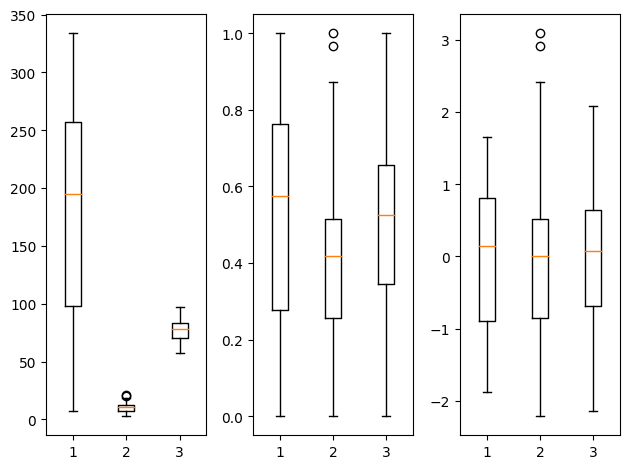

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#데이터 로딩과 전처리!
#Raw Data Loading
df = pd.read_csv('ozone.csv')

training_data = df[['Solar.R', 'Wind', 'Temp', 'Ozone']]

#이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
#결측치 처리!
training_data = training_data.dropna(how='any')

#이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

print(outlier)
#이상치를 제거한 결과를 얻어야 해요!
#내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]
display(training_data)
x_data = training_data.drop('Ozone', axis=1, inplace=False).values
t_data = training_data['Ozone'].values.reshape(-1,1)

#정규화 진행(Normalization)
#모든 feature에 대해 scale을 0과 1로 변경!
#이렇게 해야 해요!
#프로그램적으로 이 작업을 하려면 코드작업을 해야해서 좀 그래요!
#sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

standard_scaler = StandardScaler()

scaled_x.fit(x_data)
scaled_t.fit(t_data)
standard_scaler.fit(x_data)

#정규화된 Training Data Set 준비
x_data_norm = scaled_x.transform(x_data)
t_data_norm = scaled_t.transform(t_data)
x_data_stand_norm = standard_scaler.transform(x_data)

fig = plt.figure()
fig_ori = fig.add_subplot(1,3,1)
fig_minmax = fig.add_subplot(1,3,2)
fig_stand = fig.add_subplot(1,3,3)

fig_ori.boxplot(x_data)
fig_minmax.boxplot(x_data_norm)
fig_stand.boxplot(x_data_stand_norm)

plt.tight_layout()
plt.show()